imports

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Data loading

In [15]:
# file downloaded from 'https://fr.finance.yahoo.com/'
file_path = 'MC.PA.csv'
df = pd.read_csv(file_path, parse_dates=['Date'])

In [16]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [17]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

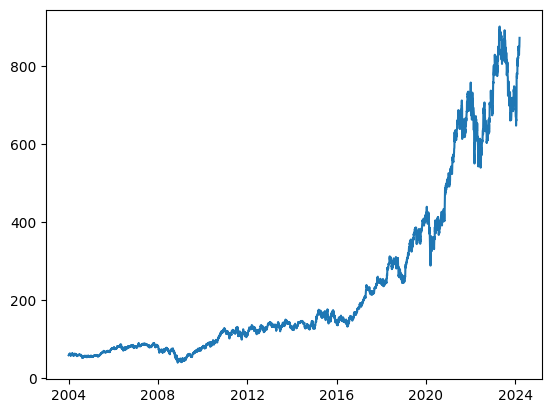

In [18]:
plt.plot(df['Date'], df['Close'])

In [19]:
df = df.loc[(df['Date'] >= '2016-01-01' )]

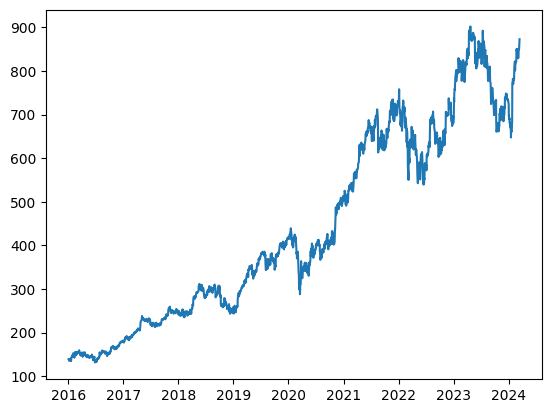

In [20]:
plt.plot(df['Date'], df['Close'])

Making linear regression lines

In [21]:
reg = LinearRegression()
reg.fit(df['Date'].values.astype(float).reshape(-1, 1), df['Close'])
pred = reg.predict(df['Date'].values.astype(float).reshape(-1, 1))
df['pred'] = pred

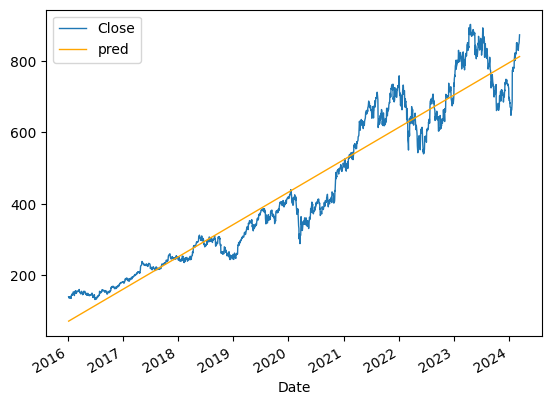

In [22]:
ax = df.plot(x='Date', y='Close', linewidth=1)
df.plot(x='Date', y='pred', color='orange', linewidth=1, ax=ax)
plt.show()

In [23]:
errors = df['Close'] - df['pred']
abs_errors = abs(errors)
mean_abs_error = abs_errors.mean()
df['pred - std'] = df['pred'] - mean_abs_error 
df['pred + std'] = df['pred'] + mean_abs_error

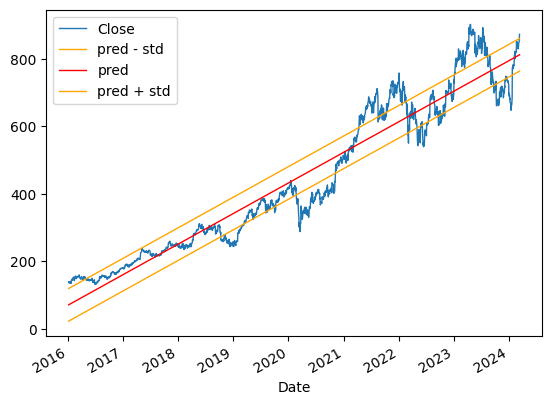

In [24]:
ax = df.plot(x='Date', y='Close', linewidth=1)
df.plot(x='Date', y='pred - std', color='orange', linewidth=1, ax=ax)
df.plot(x='Date', y='pred', color='red', linewidth=1, ax=ax)
df.plot(x='Date', y='pred + std', color='orange', linewidth=1, ax=ax)
plt.show()

In [25]:
price_to_buy = df['pred - std'].iloc[-1]
date_for_buying = df['Date'].iloc[-1]
print(f"Price_to_buy : {price_to_buy}\nat : {date_for_buying}")

Price_to_buy : 763.591068417106
at : 2024-03-14 00:00:00
